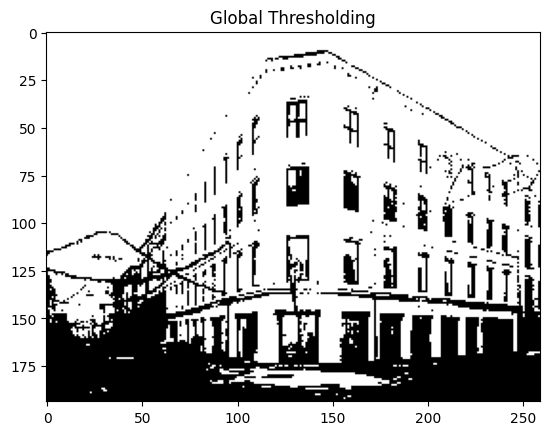

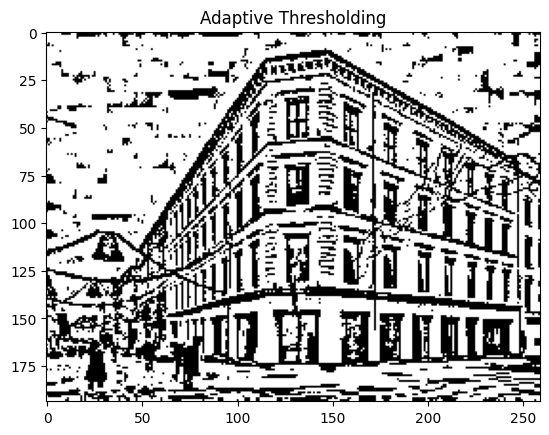

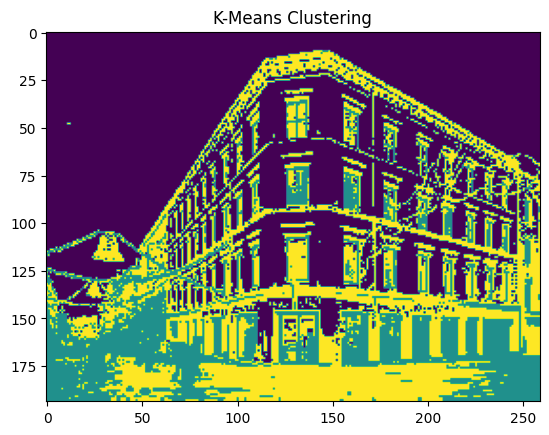

In [1]:
# Image segmentation : Segment images using global and adaptive thresholding and k means clustering

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def segment_image_global_thresholding(image_path, threshold_value=127):
  """Segments an image using global thresholding."""
  img = cv2.imread(image_path, 0)
  ret, thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
  return thresh

def segment_image_adaptive_thresholding(image_path, blockSize=11, C=2):
  """Segments an image using adaptive thresholding."""
  img = cv2.imread(image_path, 0)
  thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
  return thresh


def segment_image_kmeans(image_path, num_clusters=3):
  """Segments an image using K-means clustering."""
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  pixels = img.reshape((-1, 3))
  pixels = np.float32(pixels)

  kmeans = KMeans(n_clusters=num_clusters, random_state=0)
  kmeans.fit(pixels)
  labels = kmeans.labels_
  segmented_image = labels.reshape((img.shape[:2]))

  return segmented_image


# Example Usage
image_path = '/content/images.jpg' # Replace with your image path


# Global Thresholding
global_thresholded_image = segment_image_global_thresholding(image_path)
plt.imshow(global_thresholded_image, cmap='gray')
plt.title('Global Thresholding')
plt.show()

# Adaptive Thresholding
adaptive_thresholded_image = segment_image_adaptive_thresholding(image_path)
plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()


# K-Means Clustering
kmeans_segmented_image = segment_image_kmeans(image_path)
plt.imshow(kmeans_segmented_image)
plt.title('K-Means Clustering')
plt.show()